In [1]:
#------
from stingray import lightcurve
import numpy as np
from stingray.bispectrum import Bispectrum

import matplotlib.pyplot as plt

#edit

/home/jonny/.local/lib/python3.8/site-packages/stingray/utils.py:24: UserWarning: Numba not installed. Faking it
  warnings.warn("Numba not installed. Faking it")
/home/jonny/.local/lib/python3.8/site-packages/stingray/largememory.py:25: UserWarning: Large Datasets may not be processed efficiently due to computational constraints
  warnings.warn(


In [2]:
times = np.arange(1,11)
counts = np.array([2, 1, 3, 4, 2, 5, 1, 0, 2, 3])

lc = lightcurve.Lightcurve(times,counts)

lc.counts

array([2, 1, 3, 4, 2, 5, 1, 0, 2, 3])

In [3]:
bs = Bispectrum(lc)

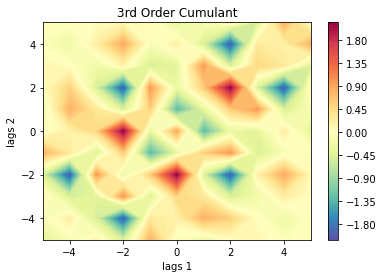

In [4]:
p = bs.plot_cum3()
p.show()

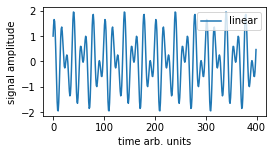

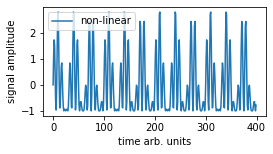

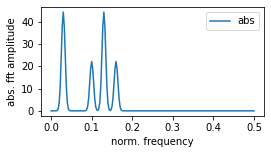

<ipython-input-6-827e8134361a>:73: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1,X2,bispec_real,vmin=-2.5, vmax=2.5,cmap='bwr')
<ipython-input-6-827e8134361a>:90: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1,X2,bispec_imag, vmin=-2.5, vmax=2.5,cmap='bwr')


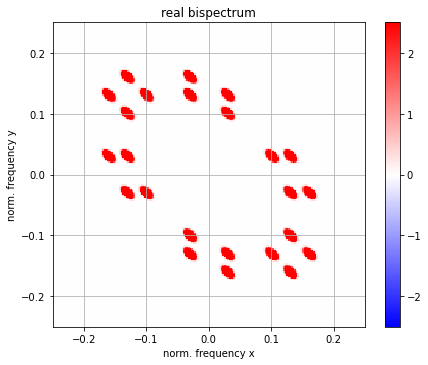

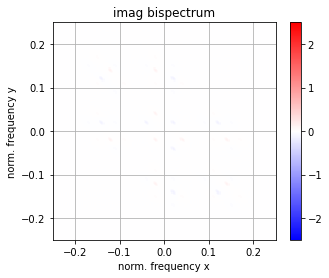

In [6]:
from scipy import signal
length = 400
t = np.arange(length)
bispec_real = np.zeros((length+1,length+1))
bispec_imag = np.zeros((length+1,length+1))

np.random.seed(6)

omega1 = 2 * np.pi * 0.05
omega2 = 2 * np.pi * 0.08
sigma = length/8.0

x = (np.cos(omega1 * t) + np.sin(omega2 * t)) 
#xnorm = 0.5 #* np.exp(-2*(t-length/2.)**2/sigma**2)

magic = np.deg2rad(45)

y = x**2
y -= np.mean(y)



plt.figure(figsize=(4,2))
plt.plot(t,x,label='linear')


plt.ylabel('signal amplitude')
plt.xlabel('time arb. units')
plt.legend()
plt.savefig('linear-time-domain.png', bbox_inches="tight",dpi=120)
plt.show()


plt.figure(figsize=(4,2))
plt.plot(t,y,label='non-linear')

plt.ylabel('signal amplitude')
plt.xlabel('time arb. units')
plt.legend()
plt.savefig('non-linear-time-domain.png', bbox_inches="tight",dpi=120)
plt.show()



#window
y *= np.exp(-(t-length/2.)**2/sigma**2)

yfft = np.fft.rfft(y)

plt.figure(figsize=(4,2))
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,np.abs(yfft),label='abs')
#plt.plot(freqs,np.imag(yfft),label='imag')
plt.legend()
plt.xlabel('norm. frequency')
plt.ylabel('abs. fft amplitude')
plt.savefig('non-linear-signal-fft.png', bbox_inches="tight",dpi=120)
plt.show()

lc = lightcurve.Lightcurve(t,y)
bs = Bispectrum(lc)
#p = bs.plot_cum3()

bispec_real = np.real(bs.bispec)
length2 = len(bispec_real)
xx, yy = np.linspace(-0.5,0.5,length2), np.linspace(-0.5,0.5,length2)
#np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X1, X2 = np.meshgrid(xx,yy)


plt.figure(figsize=(7,5.6))
plt.title('real bispectrum')
plt.pcolormesh(X1,X2,bispec_real,vmin=-2.5, vmax=2.5,cmap='bwr')
plt.grid()
plt.xlabel('norm. frequency x')
plt.ylabel('norm. frequency y')
plt.xlim([-0.25,0.25])
plt.ylim([-0.25,0.25])
plt.colorbar()
plt.savefig('non-linear-bispectrum-real.png', bbox_inches="tight",dpi=120)
bispec_imag = np.imag(bs.bispec)
length2 = len(bispec_imag)
xx, yy = np.linspace(-0.5,0.5,length2), np.linspace(-0.5,0.5,length2)
#np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X1, X2 = np.meshgrid(xx,yy)


plt.figure(figsize=(5,4))
plt.title('imag bispectrum')
plt.pcolormesh(X1,X2,bispec_imag, vmin=-2.5, vmax=2.5,cmap='bwr')
plt.grid()
plt.xlim([-0.25,0.25])
plt.ylim([-0.25,0.25])
plt.xlabel('norm. frequency x')
plt.ylabel('norm. frequency y')
plt.colorbar()

plt.savefig('non-linear-bispectrum-imag.png', bbox_inches="tight",dpi=120)

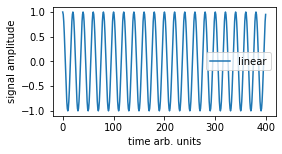

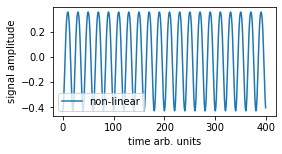

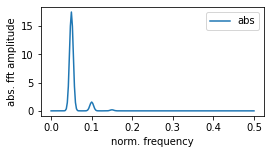

<ipython-input-14-4754395727e6>:74: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1,X2,bispec_real,vmin=-2.5, vmax=2.5,cmap='bwr')
<ipython-input-14-4754395727e6>:91: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1,X2,bispec_imag, vmin=-2.5, vmax=2.5,cmap='bwr')


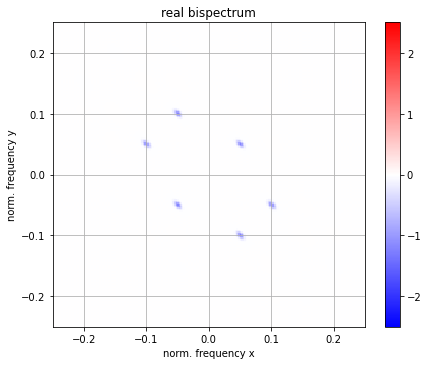

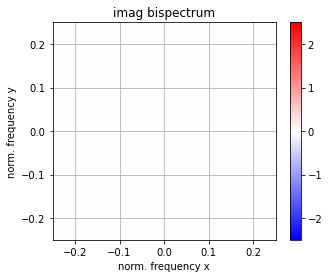

In [14]:
from scipy import signal
length = 400
t = np.arange(length)
bispec_real = np.zeros((length+1,length+1))
bispec_imag = np.zeros((length+1,length+1))

np.random.seed(6)

omega1 = 2 * np.pi * 0.05
omega2 = 2 * np.pi * 0.08
sigma = length/8.0

x = (np.cos(omega1 * t))# + np.sin(omega2 * t)) 
#xnorm = 0.5 #* np.exp(-2*(t-length/2.)**2/sigma**2)

magic = np.deg2rad(54.74)

y = np.cos(0.5 * x + magic)
y -= np.mean(y)



plt.figure(figsize=(4,2))
plt.plot(t,x,label='linear')


plt.ylabel('signal amplitude')
plt.xlabel('time arb. units')
plt.legend()
#plt.savefig('linear-time-domain.png', bbox_inches="tight",dpi=120)
plt.show()


plt.figure(figsize=(4,2))
plt.plot(t,y,label='non-linear')

plt.ylabel('signal amplitude')
plt.xlabel('time arb. units')
plt.legend()
#plt.savefig('non-linear-time-domain.png', bbox_inches="tight",dpi=120)
plt.show()



#window
y *= np.exp(-(t-length/2.)**2/sigma**2)

yfft = np.fft.rfft(y)

plt.figure(figsize=(4,2))
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,np.abs(yfft),label='abs')
#plt.plot(freqs,np.imag(yfft),label='imag')
plt.legend()
plt.xlabel('norm. frequency')
plt.ylabel('abs. fft amplitude')
#plt.savefig('non-linear-signal-fft.png', bbox_inches="tight",dpi=120)
plt.show()

lc = lightcurve.Lightcurve(t,y)
bs = Bispectrum(lc)
#p = bs.plot_cum3()

bispec_real = np.real(bs.bispec)
length2 = len(bispec_real)
xx, yy = np.linspace(-0.5,0.5,length2), np.linspace(-0.5,0.5,length2)
#xx, yy = np.linspace(0.5,-0.5,length2), np.linspace(-0.5,0.5,length2)
#np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X1, X2 = np.meshgrid(xx,yy)


plt.figure(figsize=(7,5.6))
plt.title('real bispectrum')
plt.pcolormesh(X1,X2,bispec_real,vmin=-2.5, vmax=2.5,cmap='bwr')
plt.grid()
plt.xlabel('norm. frequency x')
plt.ylabel('norm. frequency y')
plt.xlim([-0.25,0.25])
plt.ylim([-0.25,0.25])
plt.colorbar()
#plt.savefig('non-linear-bispectrum-real.png', bbox_inches="tight",dpi=120)
bispec_imag = np.imag(bs.bispec)
length2 = len(bispec_imag)
xx, yy = np.linspace(-0.5,0.5,length2), np.linspace(-0.5,0.5,length2)
#np.linspace(xmin, xmax, nx), np.linspace(ymin, ymax, ny)
X1, X2 = np.meshgrid(xx,yy)


plt.figure(figsize=(5,4))
plt.title('imag bispectrum')
plt.pcolormesh(X1,X2,bispec_imag, vmin=-2.5, vmax=2.5,cmap='bwr')
plt.grid()
plt.xlim([-0.25,0.25])
plt.ylim([-0.25,0.25])
plt.xlabel('norm. frequency x')
plt.ylabel('norm. frequency y')
plt.colorbar()

#plt.savefig('non-linear-bispectrum-imag.png', bbox_inches="tight",dpi=120)

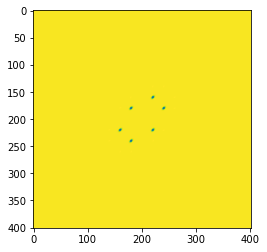

In [11]:
plt.imshow(bispec_real)